In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


from my_modules import my_functions as mybib
from my_modules import project_functions as pr


%load_ext autoreload
%autoreload 2

C:\Users\Domen\AppData\Local\Temp\ipykernel_4908\368293961.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = h_data.corr().round(3)


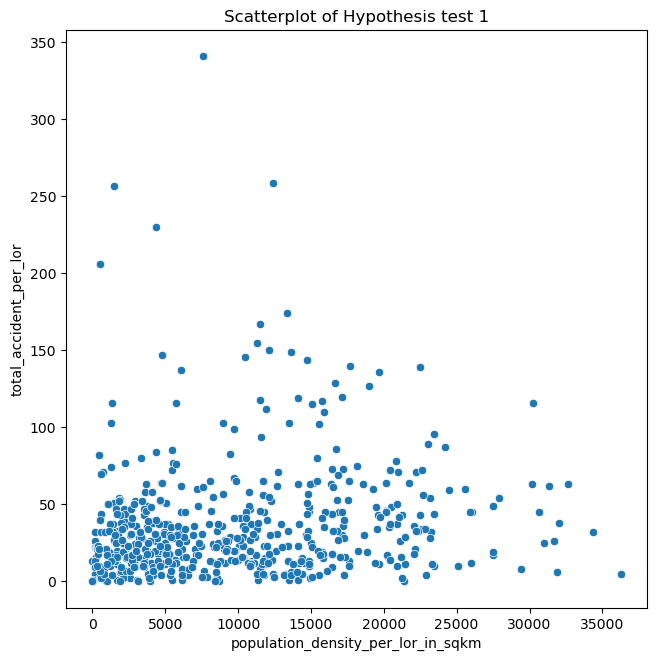

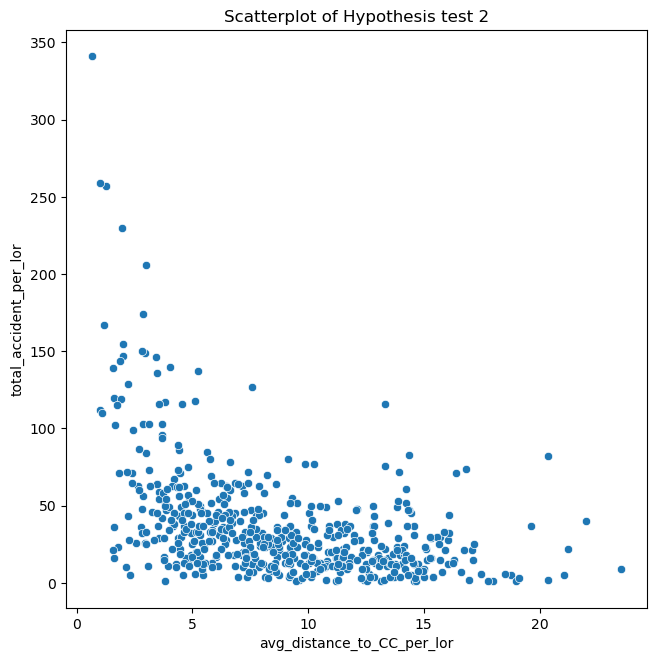

,count,mean,std,min,25%,50%,75%,max
total_accident_per_lor,542.0,36.083026,37.444951,0.000000,13.000000,26.00000,45.75000,341.000000
avg_distance_to_CC_per_lor,532.0,8.750281,4.421207,0.682425,5.117817,8.26921,12.09178,23.515957
population_density_per_lor_in_sqkm,542.0,9888.939114,7594.826013,0.000000,3558.250000,8578.50000,14868.00000,36271.000000


In [41]:
# Summary statistics
h_data = pd.read_pickle('../data/output/temp_analysis/H0_testing_data.pkl')
h_data.to_csv('../data/output/temp_analysis/H0_testing_data.csv')

correlations_matrix = h_data.corr().round(3)
correlations_matrix



plt.figure(figsize=(7.5,7.5))
sns.scatterplot(data=h_data, x='population_density_per_lor_in_sqkm', y='total_accident_per_lor')
plt.title(f"Scatterplot of Hypothesis test 1")
plt.show()


plt.figure(figsize=(7.5,7.5))
plt.ylabel("total_accident_per_lor")
sns.scatterplot(data=h_data, x='avg_distance_to_CC_per_lor', y='total_accident_per_lor')
plt.title(f"Scatterplot of Hypothesis test 2")
plt.show()


display(h_data.describe().T)


In [37]:
# https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
from scipy.stats import pearsonr

h_data_clean = h_data.dropna()

cc1, pv1 = pearsonr(h_data_clean['total_accident_per_lor'], h_data_clean['population_density_per_lor_in_sqkm'])
cc2, pv2 = pearsonr(h_data_clean['total_accident_per_lor'], h_data_clean['avg_distance_to_CC_per_lor'])

print(f""" 
      Hypthesis 1:
      Pearson's corr coefficient is: {cc1.round(3)} 
      p-value is: {pv1.round(3)}.
      
      Hypthesis 2:
      Pearson's corr coefficient is: {cc2.round(3)} 
      p-value is: {pv2.round()}.
      
           
      """)

 
      Hypthesis 1:
      Pearson's corr coefficient is: 0.127 
      p-value is: 0.003.
      
      Hypthesis 2:
      Pearson's corr coefficient is: -0.46 
      p-value is: 0.0.
      
           
      


## Results of Testing Hypotheses
### Hypothesis 1: Higher population density, more bike accidents?
Test used: Pearson's Correlation
- How much they relate: 0.127 (a little)
- Confidence in result: 99.7% (pretty sure)
What it means: There's a slight link between how many people live in an area and the number of bike accidents. We're pretty sure about this result.

## Hypothesis 2: Closer to the city center, more bike accidents?
### Test used: Pearson's Correlation
- How much they relate: -0.46 (moderately)
- Confidence in result: Almost 100% (very sure)
What it means: There's a stronger link between how close an area is to the city center and the number of bike accidents. We're very sure about this.